# To-do list

To-do liste pour le traitement des données:

1. Données
   - Insérer les données d'observation
   - Si nécessaire, manipuler ces données brutes pour obtenir les valeurs nettes de x et y
2. Modélisation et régression
   - Modéliser les données par une fonction `func`
   - Donner une valeur initiale à chaque paramètre de la fonction
3. Affichage des résultats et joli graphe !
   - Donner un titre, une légende au graphique
   - Tout exécuter
   - Enregistrer la courbe et/ou le notebook si besoin (pour garder ou partager les résultats)

Facultatif:

- Ecrire un bref *Abstract* de la manipulation
- Changer le style de la courbe ou des points sur le graphe

# Abstract

> Si besoin, expliquez ici brièvement la manipulation en cours...
Vous pouvez faire un texte, mettre une ou deux formules, une image, ça fait pas de mal !
[Voici une documentation MarkDown](https://www.markdownguide.org/cheat-sheet), pour ajouter des images, des formules en [Latex](https://fr.wikibooks.org/wiki/LaTeX/%C3%89crire_des_math%C3%A9matiques), des listes...

# Bibliothèques

In [1]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

from uncertainties import ufloat
from uncertainties.umath import *

# Pour faire un peu de magie noire pythonesque...
import inspect

# Programme

<a id="donnees"></a>
## Données

Mettre ici tous les arrays de données:
- "brutes": arrays tapées lors du TP
- "traitées": arrays avec les valeurs à présenter sur le graphe

On conviendra que les arrays seront appelés par leur symbole algébrique (vitesse par `v`, distance focale par `f`...) et les incertitude et ajoutant un `delta` devant.

In [2]:
# Mesures brutes


# Mesures traitées
x = np.linspace(2, 9, 10) + 0.1*np.random.randn(10)
delta_x = np.full(x.shape, 0.1)
y = 0.5 * x + 0.1*np.random.standard_normal(x.shape)
delta_y = np.full(x.shape, 0.1)

xmin, xmax = np.amin(x), np.amax(x)
ymin, ymax = np.amin(x), np.amax(x)

<a id="model"></a>
## Modélisation et régression

On insère ici la fonction $y=f(x)$, où chacun des paramètres de la fonction sera noté après le `x`.

(Pour faire des manipulations pratiques plus tard, on va aussi créer `noms_symboles` avec les noms de chacun des paramètres de la fonction.)

In [3]:
def func(x, a, b):
    """Fonction modélisant la courbe."""
    return a * x + b # Exemple avec une fonction linéaire

# Cette ligne fait de la magie noire... Elle récupère les noms des paramètres de la fonction !
noms_symboles = tuple(value.name for value in inspect.signature(func).parameters.values())
noms_symboles = noms_symboles[1:]

On va ensuite initialiser les paramètres de la fonction avec une liste. Ils ne sont que le point de départ, donc mettre des estimations même grossières fait l'affaire.

In [4]:
# Donnez une valeur initiale à chaque symbole -> {"nom": valeur, ...}
estimations_initiales = {"a": 1.2, "b": 0.03}

params_init = np.array([estimations_initiales[nom] for nom in noms_symboles])

C'est parti pour la régression ! La fonction `curve_fit` va utiliser les données, les incertitudes, le modèle de courbe et les estimations pour retourner les paramètres optimaux, ainsi qu'une mesure de la pertinence du modèle (la matrice de covariance).
Cette matrice nous servira à calculer la moyenne quadratique des erreurs du modèle dans notre cas.

In [5]:
parametres_curve, pcov_curve = curve_fit(func, x, y, p0=params_init, sigma=delta_y,absolute_sigma=True)
std_parametres_curve = np.sqrt(np.diag(pcov_curve))
chi_curve = np.sqrt(((func(x,*parametres_curve)-y)**2).sum()) #racine de la somme des résidus au carré
nombre_params= len(parametres_curve)

In [6]:
resultats_curve = [ufloat(parametres_curve[i],std_parametres_curve[i]) for i in range(nombre_params)]

<a id="graphique"></a>
## Affichage des résultats et joli graphe !

La machine a fini de tourner, regardons ce qu'on obtient !
Pour ça, on va afficher:
- les paramètres trouvés par `curve_fit`
- La moyenne quadratique des erreurs, qu'on appelera `chi` (comme la lettre $\chi$, à ne pas confondre avec le test du Chi 2...)

In [7]:
for i in range(nombre_params):
    print(f'{noms_symboles[i]} = {resultats_curve[i]:.2e}')
print(f'Score chi: {chi_curve:.2e}')

a = (4.84+/-0.14)e-01
b = (8.42+/-8.55)e-02
Score chi: 2.17e-01


Et maintenant, traçons la courbe !

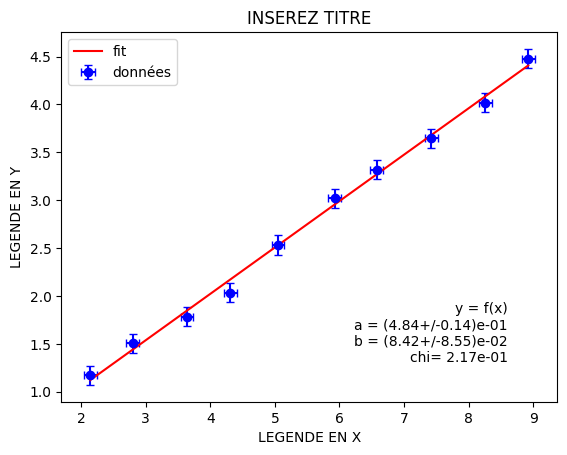

In [8]:
# Un bon graphe est un graphe éloquent !
# Donnez un titre, des légendes, les unités des axes...
# C'est simple: si vous oubliez, vous verrez "INSEREZ TITRE" pour vous le rappeler !
titre = "INSEREZ TITRE"
legende_x = "LEGENDE EN X"
legende_y = "LEGENDE EN Y"
texte_func = "y = f(x)" # Ecrivez la formule de func (facultatif)

# Si vous voulez changez le style... Renseignez sur les styles de graphiques Matplotlib !
# Première lettre = couleur
# Deuxième (faucltative): forme
style_points = "bo"
style_courbe = "r"

legende_curve = texte_func + '\n'
for i in range(nombre_params):
    legende_curve+=f'{noms_symboles[i]} = {resultats_curve[i]:.2e}\n'
legende_curve += f'chi= {chi_curve:.2e}'

fig_curve,ax_curve = plt.subplots()
ax_curve.cla()
ax_curve.set_xlabel(legende_x)
ax_curve.set_ylabel(legende_y)
ax_curve.set_title(titre)
ax_curve.errorbar(x,y,yerr=delta_y,xerr=delta_x,fmt=style_points,label='données',capsize=3)

xfit_curve = np.linspace(xmin,xmax)
yfit_curve = func(xfit_curve, *parametres_curve[:]) # le symbole «*» permet de déballer ("unpack") l'array des parametres pour appeler func()
ax_curve.plot(xfit_curve,yfit_curve,style_courbe,label='fit')
ax_curve.text(.9,.1,legende_curve,transform=ax_curve.transAxes,horizontalalignment='right', verticalalignment='bottom')

ax_curve.legend(loc='best')

Et voilà, un beau graphique de l'expérience ! Eh, vous avez fait un beau TP dites-moi !